# Credit Default Prediction - Kaggle Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel(r"C:\Users\Pigi\Desktop\Σχολή ΔΕΤ\8ο εξάμηνο ΔΕΤ\Πρακτική & Πτυχιακή\Πτυχιακή\Credit Default Prediction\train.xlsx",  sheet_name='train')

## Checking All columns for Missing Values

In [3]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [4]:
df.dtypes

Id                                int64
Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                         int64
Number of Open Accounts           int64
Years of Credit History         float64
Maximum Open Credit               int64
Number of Credit Problems         int64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount               int64
Current Credit Balance            int64
Monthly Debt                      int64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [5]:
df.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

### % of Missing Values for the Columns that contain Missing Values

#### Annual Income

In [6]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [7]:
df['Annual Income'].isnull().sum()/df.shape[0] * 100

20.76

In [8]:
df.isnull().sum()/df.shape[0] * 100

Id                               0.000000
Home Ownership                   0.000000
Annual Income                   20.760000
Years in current job             4.946667
Tax Liens                        0.000000
Number of Open Accounts          0.000000
Years of Credit History          0.000000
Maximum Open Credit              0.000000
Number of Credit Problems        0.000000
Months since last delinquent    54.413333
Bankruptcies                     0.186667
Purpose                          0.000000
Term                             0.000000
Current Loan Amount              0.000000
Current Credit Balance           0.000000
Monthly Debt                     0.000000
Credit Score                    20.760000
Credit Default                   0.000000
dtype: float64

#### Years in current job

In [9]:
df['Years in current job'].isnull().sum()/df.shape[0] * 100

4.946666666666666

#### Months since last delinquent

In [10]:
df['Months since last delinquent'].isnull().sum()/df.shape[0] * 100

54.413333333333334

#### Bankruptcies  

In [11]:
df['Bankruptcies'].isnull().sum()/df.shape[0] * 100

0.18666666666666668

#### Credit Score

In [12]:
df['Credit Score'].isnull().sum()/df.shape[0] * 100

20.76

In [13]:
df.describe()

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


### Attempting to drop rows with missing values


In [14]:
df.shape

(7500, 18)

In [15]:
df_wn = df.dropna()

#### % of missing values if we drop rows

In [16]:
(df_wn.shape[0] - df.shape[0])/df.shape[0] * 100

-65.53333333333333

If we drop all rows that contain even one missing value, then we are eliminating 65% of our dataset and remain with 35% of the initial data. That number is really low therefore we need other ways to deal with the missing values.

### Visualization of categorical columns
We are going to visualize the frequency of default for each categorical column/characteristic that is relative to each customer.

In [39]:
def visualize_col_default(df, col):
    
    %matplotlib inline
    pd.crosstab(df[col],df['Credit Default']).plot(kind='bar')
    plt.title('Default Frequency for Dept Consolidation')
    plt.xlabel(col)
    plt.ylabel('Frequency of Default')

#### Home Ownership

In [29]:
df[(df['Home Ownership']== 'Rent') & (df['Credit Default'] == 1)].shape[0]/df[df['Home Ownership']== 'Rent'].shape[0]*100

31.30461922596754

In [40]:
dc = df[df['Purpose']== 'debt consolidation']

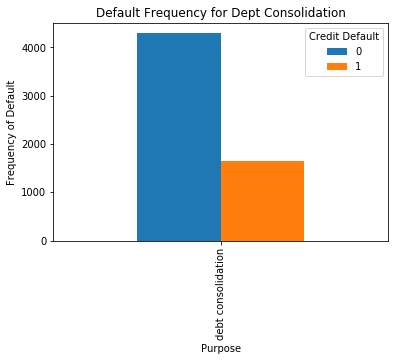

In [41]:
visualize_col_default(dc, 'Purpose')

In [38]:
df[(df['Purpose']== 'debt consolidation') & (df['Credit Default'] == 0)].shape[0]/df[df['Purpose']== 'debt consolidation'].shape[0]*100

72.1736204576043

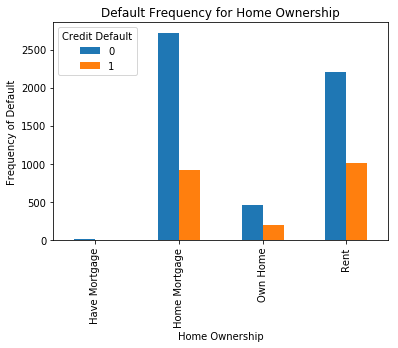

In [18]:
visualize_col_default(df, 'Home Ownership')

#### Years in current job

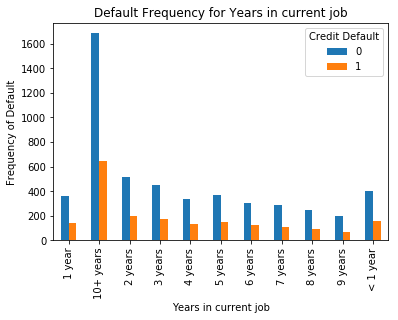

In [31]:
visualize_col_default(df, 'Years in current job')

#### Purpose

In [19]:
df[(df['Years in current job'] == '10+ years') & (df['Credit Default'] == 0)].shape

(1688, 18)

In [20]:
ten_plus_years = df[(df['Years in current job'] == '10+ years')] 

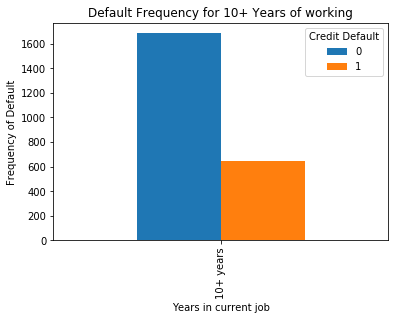

In [21]:
visualize_col_default(ten_plus_years, 'Years in current job')

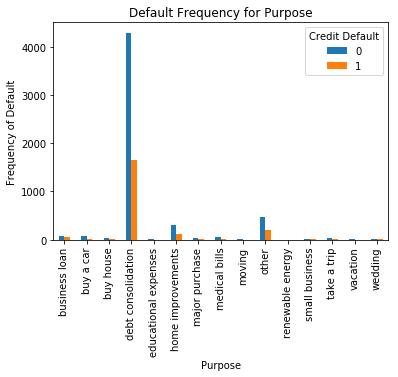

In [35]:
visualize_col_default(df, 'Purpose')

In this case we can see that through our plot we cannot see clearly the Credit Default frequency for each value of the column 'Purpose'. That is because most of the customers occur in the 3 most frequent categories. To be exact, around 94% of customers belong in the top 3 values of the columns Purpose.

In [23]:
df[df['Purpose'].isin(['debt consolidation','other','home improvements'])].shape[0] / df.shape[0] * 100

93.61333333333334

#### Term

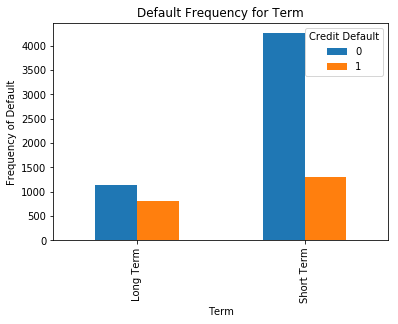

In [33]:
visualize_col_default(df, 'Term')

### Checking for the columns that contain categorical values

In [25]:
df.dtypes

Id                                int64
Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                         int64
Number of Open Accounts           int64
Years of Credit History         float64
Maximum Open Credit               int64
Number of Credit Problems         int64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount               int64
Current Credit Balance            int64
Monthly Debt                      int64
Credit Score                    float64
Credit Default                    int64
dtype: object

#### Unique values visualization

In [26]:
def visualize_values(df, col):
    sns.countplot(x = col, data = df, palette = None)
    plt.show()

#### Home Ownership
'Home Ownsership' has 0 missing values and can take 4 different values.

In [27]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

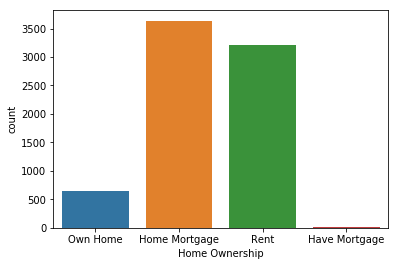

In [28]:
visualize_values(df, 'Home Ownership')

#### Years in current job
This field contains string values that we can convert to integers for our own ease instead of treating it like a categorical value. 

In [29]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

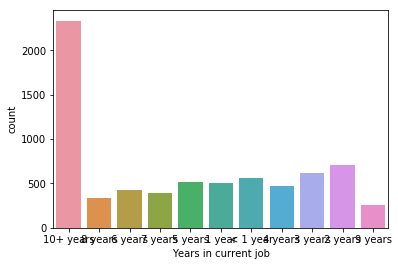

In [30]:
visualize_values(df, 'Years in current job')

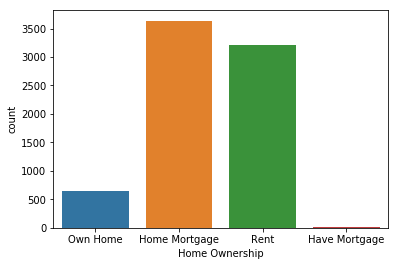

In [31]:
visualize_values(df, 'Home Ownership')

In [32]:
def convert_to_numeric_form(years, int_years, df, col):
   df.loc[df[col] == years, col] = int_years
   


In [33]:
convert_to_numeric_form('10+ years', '10', df, 'Years in current job')
convert_to_numeric_form('2 years', '2', df, 'Years in current job')
convert_to_numeric_form('3 years', '3', df, 'Years in current job')
convert_to_numeric_form('< 1 year', '0', df, 'Years in current job')
convert_to_numeric_form('5 years', '5', df, 'Years in current job')
convert_to_numeric_form('1 year', '1', df, 'Years in current job')
convert_to_numeric_form('4 years', '4', df, 'Years in current job')
convert_to_numeric_form('6 years', '6', df, 'Years in current job')
convert_to_numeric_form('7 years', '7', df, 'Years in current job')
convert_to_numeric_form('8 years', '8', df, 'Years in current job')
convert_to_numeric_form('9 years', '9', df, 'Years in current job')


In [34]:
df['Years in current job'].value_counts()

10    2332
2      705
3      620
0      563
5      516
1      504
4      469
6      426
7      396
8      339
9      259
Name: Years in current job, dtype: int64

In [35]:
# Convert this columns from categorical to numeric
df['Years in current job'] = pd.to_numeric(df['Years in current job'])

In [36]:
df

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,1,Own Home,1025487.0,10.0,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,2,Home Mortgage,751412.0,8.0,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,3,Own Home,805068.0,6.0,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,4,Rent,776264.0,8.0,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0
5,5,Rent,NaN,7.0,0,12,14.6,366784,0,NaN,0.0,other,Long Term,337304,165680,18692,NaN,1
6,6,Home Mortgage,1511108.0,10.0,0,9,20.3,388124,0,73.0,0.0,home improvements,Short Term,99999999,51623,2317,745.0,0
7,7,Rent,1040060.0,10.0,0,13,12.0,330374,0,18.0,0.0,other,Short Term,250888,89015,19761,705.0,1
8,8,Home Mortgage,NaN,5.0,0,17,15.7,0,1,NaN,1.0,home improvements,Short Term,129734,19,17,NaN,0
9,9,Home Mortgage,NaN,1.0,0,10,24.6,511302,0,6.0,0.0,debt consolidation,Long Term,572880,205333,17613,NaN,1


#### Purpose
Purpose has 0 missing values and the values it contains cannot be converted to numeric yet. Due to the fact the column 'Purpose' can take a lot of values we are not going to visualize it through a plot.

In [37]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

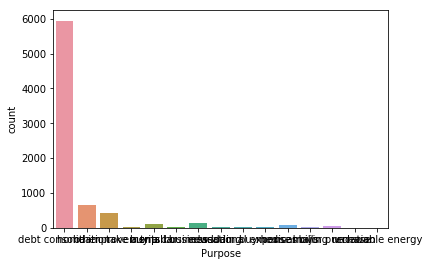

In [38]:
visualize_values(df, 'Purpose')

#### Term
This column contains only 2 values that can be converted to a binary. That means 'Short Term' = 0 and 'Long Term' = 1.

In [39]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

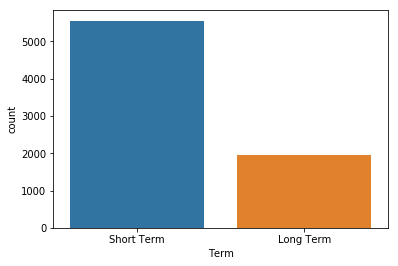

In [40]:
visualize_values(df, 'Term')

In [41]:
convert_to_numeric_form('Short Term', '0', df, 'Term')
convert_to_numeric_form('Long Term', '1', df, 'Term')

In [42]:
# Convert this columns from categorical to numeric
df['Term'] = pd.to_numeric(df['Term'])

In [43]:
df.dtypes

Id                                int64
Home Ownership                   object
Annual Income                   float64
Years in current job            float64
Tax Liens                         int64
Number of Open Accounts           int64
Years of Credit History         float64
Maximum Open Credit               int64
Number of Credit Problems         int64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                              int64
Current Loan Amount               int64
Current Credit Balance            int64
Monthly Debt                      int64
Credit Score                    float64
Credit Default                    int64
dtype: object

## One-hot encoding
Here we are transforming the categorical values of the Columns 'Home Ownership' and 'Purpose' to numerical values. We do that through one-hot encoding and the creation of dummies. 

This method is convenient in this case since we only have 4 values for 'Home Ownership' and 15 for 'Purpose'. Therefore we will not add too many columns to our dataframe.

In [44]:
df = pd.get_dummies(df, columns=['Home Ownership', 'Purpose'])

### Treating Missing Values

In [45]:
df.isnull().sum()

Id                                 0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
Home Ownership_Have Mortgage       0
Home Ownership_Home Mortgage       0
Home Ownership_Own Home            0
Home Ownership_Rent                0
Purpose_business loan              0
Purpose_buy a car                  0
Purpose_buy house                  0
Purpose_debt consolidation         0
Purpose_educational expenses       0
Purpose_home improvements          0
Purpose_major purchase             0
P

In [46]:
cols_missing_vals = ['Annual Income', 'Years in current job', 'Months since last delinquent','Bankruptcies','Credit Score']

In [47]:
df.columns

Index(['Id', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'Home Ownership_Have Mortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_business loan', 'Purpose_buy a car',
       'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational expenses', 'Purpose_home improvements',
       'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [48]:
df.describe()


,Id,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
count,7500.000000,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000
mean,3749.500000,1.366392e+06,5.880348,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,...,0.054933,0.005333,0.009467,0.001467,0.088667,0.000267,0.003467,0.004933,0.001067,0.00200
std,2165.207842,8.453392e+05,3.620092,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,...,0.227865,0.072840,0.096842,0.038272,0.284281,0.016329,0.058780,0.070069,0.032645,0.04468
min,0.000000,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1874.750000,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3749.500000,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,5624.250000,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,7499.000000,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [49]:
df1 = df
df1.drop('Id', axis = 'columns', inplace = True)
df1.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
count,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000
mean,1.366392e+06,5.880348,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,0.259200,...,0.054933,0.005333,0.009467,0.001467,0.088667,0.000267,0.003467,0.004933,0.001067,0.00200
std,8.453392e+05,3.620092,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,0.438225,...,0.227865,0.072840,0.096842,0.038272,0.284281,0.016329,0.058780,0.070069,0.032645,0.04468
min,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df[cols_missing_vals]=imputer.fit_transform(df[cols_missing_vals])  

In [51]:
df.isnull().sum()

Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Home Ownership_Have Mortgage    0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_business loan           0
Purpose_buy a car               0
Purpose_buy house               0
Purpose_debt consolidation      0
Purpose_educational expenses    0
Purpose_home improvements       0
Purpose_major purchase          0
Purpose_medical bills           0
Purpose_moving                  0
Purpose_other                   0
Purpose_renewa

### Normalization of Data
From our statistical analysis we can see that the range of values for each column are different from each other. This means that one column with a larger range may act as a more significant factor for our classification. That is the reason why normalization is really important in this case. 

In [52]:
def z_score(df):
    # apply the z-score method
    for column in df.columns:
        if column != 'Credit Default':
            df[column] = (df[column] - df[column].mean()) / df[column].std()
        
    return df
    
# call the z_score function
df = z_score(df)

df

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,-1.175185e+00,6.542922e-15,-0.110946,-0.026673,1.133569,-0.016173,1.664668,2.309815e-13,2.545202,-0.591477,...,-0.241078,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
1,-4.530408e-01,1.167236e+00,-0.110946,0.788170,-0.428499,0.014762,-0.340956,2.309815e-13,-0.337743,1.690457,...,-0.241078,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
2,-8.172692e-01,6.005688e-01,-0.110946,-0.026673,2.369023,0.014806,-0.340956,2.309815e-13,-0.337743,-0.591477,...,-0.241078,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
3,-7.459638e-01,3.390147e-02,-0.110946,-0.637804,0.593946,-0.049778,1.664668,2.309815e-13,2.545202,-0.591477,...,-0.241078,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
4,-7.842425e-01,6.005688e-01,-0.110946,0.380749,-0.669910,-0.034900,1.664668,2.309815e-13,-0.337743,-0.591477,...,-0.241078,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
5,4.269958e-14,3.172351e-01,-0.110946,0.177038,-0.527903,-0.036089,-0.340956,2.309815e-13,-0.337743,1.690457,...,-0.241078,-0.07322,-0.097754,-0.038323,3.205749,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
6,1.923188e-01,1.167236e+00,-0.110946,-0.434094,0.281532,-0.034757,-0.340956,2.616150e+00,-0.337743,-0.591477,...,4.147480,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
7,-4.336742e-01,1.167236e+00,-0.110946,0.380749,-0.897119,-0.038361,-0.340956,-1.139998e+00,-0.337743,-0.591477,...,-0.241078,-0.07322,-0.097754,-0.038323,3.205749,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
8,4.269958e-14,-2.494322e-01,-0.110946,1.195591,-0.371697,-0.058975,1.664668,2.309815e-13,2.545202,-0.591477,...,4.147480,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763
9,4.269958e-14,-1.382767e+00,-0.110946,-0.230383,0.892159,-0.027071,-0.340956,-1.959521e+00,-0.337743,1.690457,...,-0.241078,-0.07322,-0.097754,-0.038323,-0.311898,-0.016331,-0.058977,-0.070407,-0.032675,-0.044763


## Testing the Logistic Regression Algorithm
We will be using the Algorithm of 'Logistic Regression' in order to predict Credit Default in our dataset. We will apply this to our test set in order to predict whether or not our customers in the test set are going to default.

Afterwards we are also going to find out the significance of each question/factor and how much it contributes to the repurchase. 

### Default Percentages
We are printing out the default and non-default percentages of the customers in the dataframe in order to check if the dataset is unbalanced or not.

In [53]:
def default_perc(df):
    non_default_count = len(df[df['Credit Default'] == 0])
    default_count = len(df[df['Credit Default'] == 1])
    
    non_default_pct = non_default_count/(non_default_count + default_count)
    print("percentage of non-default is", non_default_pct * 100)
   
    default_pct = default_count/(non_default_count + default_count)
    print("percentage of default", default_pct * 100)

In [54]:
default_perc(df)

percentage of non-default is 71.82666666666667
percentage of default 28.173333333333332


### Algorithm Implementation

#### Split train and test set

In [55]:
from sklearn import preprocessing

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Split training data into train and test sets

In [56]:
y= df['Credit Default'].values
X= df.drop(labels='Credit Default',axis=1)
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Test all algorithms and print metrics

In [57]:
from sklearn.metrics import precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Logistic Regression Classifier

In [67]:
# Test Logistic Regression classifier

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print("Summary Of Results")
print(result.summary2())
    
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
       
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

logreg_predict = logreg.predict(X_test)
logreg_cv_score = cross_val_score(logreg, X, y, cv = 10, scoring = 'roc_auc')

y_prob_logreg = logreg.predict_proba(X_test)

score_logreg = f1_score(y_test, logreg.predict(X_test), pos_label = 0)

y_test_logreg = y_test
X_test_logreg = X_test
    
logreg_cv_score = cross_val_score(logreg, X, y, cv = 10, scoring = 'roc_auc')
print("Mean AUC Score")
print("Mean AUC Score - Logistic Regression: ", logreg_cv_score.mean())

Optimization terminated successfully.
         Current function value: 0.457763
         Iterations 20
Summary Of Results
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.230    
Dependent Variable:           y                         AIC:                       6928.4498
Date:                         2021-06-29 17:03          BIC:                       7143.0522
No. Observations:             7500                      Log-Likelihood:            -3433.2  
Df Model:                     30                        LL-Null:                   -4459.4  
Df Residuals:                 7469                      LLR p-value:               0.0000   
Converged:                    1.0000                    Scale:                     1.0000   
No. Iterations:               20.0000                                                       
--------------------------------------------------------------------------------

C:\Users\Pigi\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Pigi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Pigi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Pigi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Accuracy of logistic regression classifier on test set: 0.77
Mean AUC Score
Mean AUC Score - Logistic Regression:  0.7633838867866272


## Random Forest Classifier

Initially we are starting without optimizing the parameters used for the random forest classifier.

In [59]:
df.columns

Index(['Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'Home Ownership_Have Mortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_business loan', 'Purpose_buy a car',
       'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational expenses', 'Purpose_home improvements',
       'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [60]:
df[df['Years in current job'] == 1.167236e+00]['Credit Default']

Series([], Name: Credit Default, dtype: int64)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

    
# Test the random forest classifier
   
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
    
    
# Evaluate Performance
rfc_cv_score = cross_val_score(rfc, X, y, cv = 10, scoring = 'roc_auc')
    

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Confusion Matrix
[[1010   31]
 [ 320  139]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1041
           1       0.82      0.30      0.44       459

    accuracy                           0.77      1500
   macro avg       0.79      0.64      0.65      1500
weighted avg       0.78      0.77      0.73      1500



All AUC Scores
[0.76542922 0.76920135 0.74820846 0.75345778 0.76148564 0.75071442
 0.76321782 0.77040664 0.74156116 0.72101424]


Mean AUC Score
Mean AUC Score - Random Forest:  0.7544696734092817


### Tuning Hyperparameters

In [185]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# Max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# Create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.6min finished


{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 340}


In [62]:
# Implementing the classifier again with the tuned hyperparameters

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 340, max_features = 'auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv = 10, scoring = 'roc_auc')

y_prob_rfc = rfc.predict_proba(X_test)

score_rfc = f1_score(y_test, rfc.predict(X_test), pos_label = 0)

y_test_rfc = y_test
X_test_rfc = X_test

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Confusion Matrix
[[1012   29]
 [ 320  139]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1041
           1       0.83      0.30      0.44       459

    accuracy                           0.77      1500
   macro avg       0.79      0.64      0.65      1500
weighted avg       0.78      0.77      0.73      1500



All AUC Scores
[0.76436969 0.76618101 0.75385786 0.75636821 0.77725998 0.75193662
 0.76795276 0.78037105 0.75608911 0.73108824]


Mean AUC Score
Mean AUC Score - Random Forest:  0.7605474519903366


### Preparing the plots

In [64]:
def plot(results):

    # Plot the precision-recall curves

    fig = plt.figure(figsize=(6, 6))
    fig.canvas.set_window_title('Classifying data from ')

    for label, precision, recall in results:
        plt.plot(recall, precision, label=label)

    plt.title('Precision-Recall Curves')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='lower left')

    plt.tight_layout()

    plt.show()
    plt.close()


In [65]:
def classifier_plots(X_test, y_test, y_prob, y_pred, score):
    
    
    # Generate the P-R curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1], pos_label = 0)
    
    # Include the score in the title
    yield ' (F1 score={:.3f})'.format(score), precision, recall
    
    # Generate the ROC curve for random forest
    fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_prob[:,1], pos_label= 0)
    auc = roc_auc_score(y_test, y_prob[:,1])
    print('AUC: %.3f' % auc)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
  
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

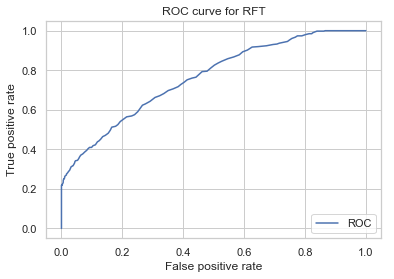

In [200]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for RFT')
plt.legend(loc='best')
plt.legend(loc=4)
plt.show()

Evaluating Logistic Regression Classifier
AUC: 0.768
Accuracy: 0.768
Plotting the results


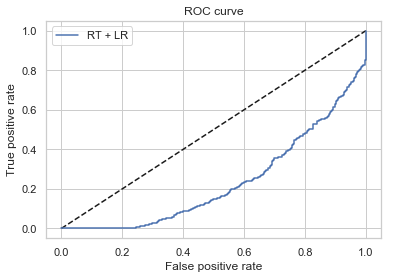

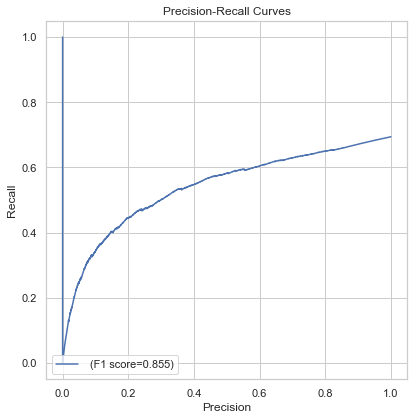

In [66]:
print("Evaluating Logistic Regression Classifier")
results = list(classifier_plots(X_test_logreg, y_test_logreg, y_prob_logreg, logreg_predict, score_logreg))
    
# Display the results
print("Plotting the results")
plot(results)

Evaluating Random Forest Classifier
AUC: 0.761
Accuracy: 0.766
Plotting the results


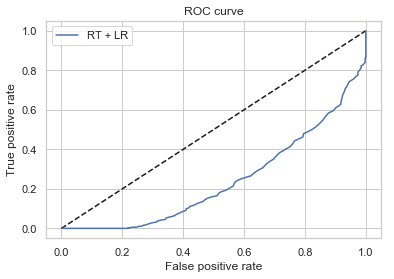

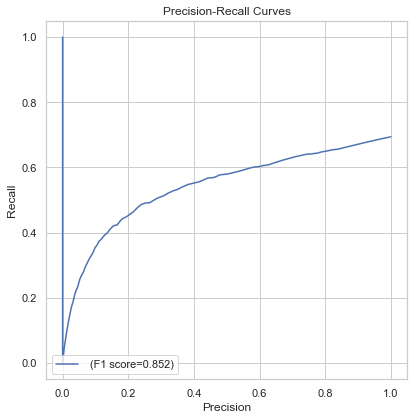

In [191]:
print("Evaluating Random Forest Classifier")
results = list(classifier_plots(X_test_rfc, y_test_rfc, y_prob_rfc, rfc_predict, score_rfc))
    
# Display the results
print("Plotting the results")
plot(results)